In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/stroke-prediction-dataset
['healthcare-dataset-stroke-data.csv']


In [3]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df['ever_married'] = le.fit_transform(df['ever_married'])

In [10]:
df['work_type'] = le.fit_transform(df['work_type'])

In [11]:
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [12]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [13]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/tmp/ipython-input-3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [15]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Lets just see all things on simple models

In [17]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
accuracy_score(lr.predict(x_test),y_test)

0.9393346379647749

In [19]:
cm = confusion_matrix(lr.predict(x_test),y_test)

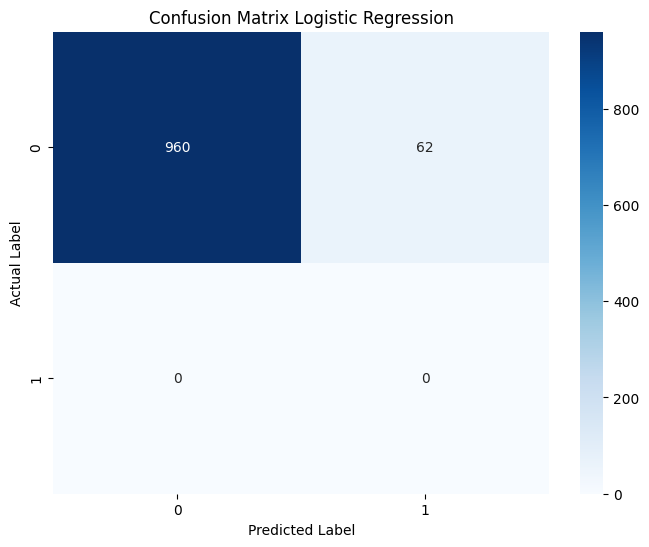

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [21]:
from scipy import stats

In [22]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],   # include "none" too
    'C': stats.loguniform(1e-3, 1e2),   # search range for regularization strength
    'solver': ['liblinear', 'saga'],   # both support l1 & elasticnet
    'max_iter': [100,500,1000],   # higher for convergence
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # only used if penalty='elasticnet'
}

reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='accuracy'
)

reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x787767df7800>,
                                        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [23]:
reg.best_score_

np.float64(0.9542565830622498)

In [24]:
reg.best_params_

{'C': np.float64(0.4205156450913872),
 'l1_ratio': 0.7,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [25]:
cm2 = confusion_matrix(reg.predict(x_test),y_test)

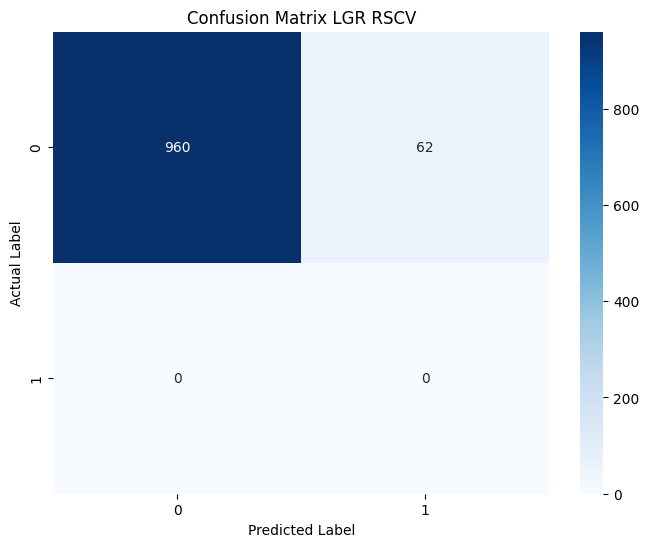

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGR RSCV')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h1> lets try KNN </h1>

In [27]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
accuracy_score(kn.predict(x_test),y_test)

0.9344422700587084

In [29]:
cm3 = confusion_matrix(kn.predict(x_test),y_test)

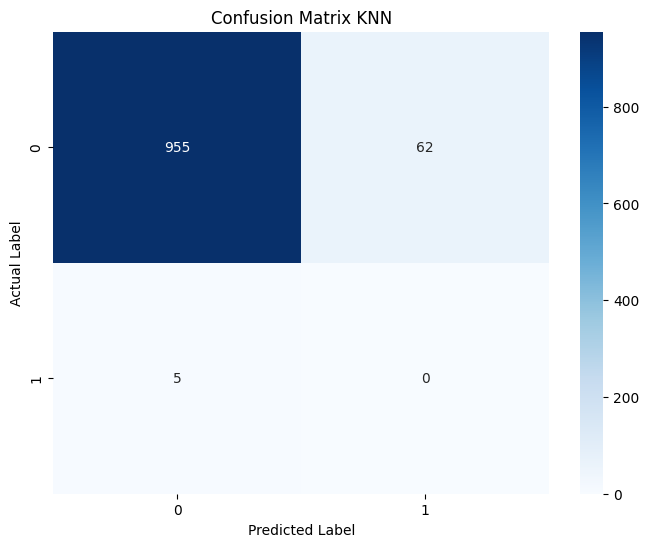

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
from scipy.stats import randint, uniform

In [32]:
param_dist = {
    'n_neighbors': randint(1, 17),        # number of neighbors to try
    'weights': ['uniform', 'distance'],   # distance weighting
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # distance metrics
    'p': [1, 2,3],   # 1 = Manhattan, 2 = Euclidean (only for minkowski)
    'leaf_size': randint(10, 50)          # affects tree search speed
}
knn = KNeighborsClassifier()

search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=50,         # number of random combinations
    cv=5,              # 5-fold CV
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

search.fit(x_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best Score:", search.best_score_)

Best Parameters: {'leaf_size': 48, 'metric': 'euclidean', 'n_neighbors': 15, 'p': 3, 'weights': 'distance'}
Best Score: 0.9542565830622498


In [33]:
cm4 = confusion_matrix(search.predict(x_test),y_test)

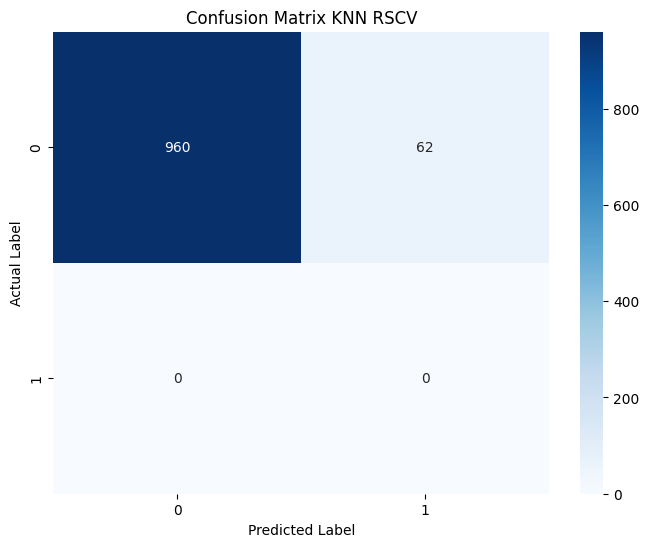

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN RSCV')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Okay now decision tree

In [35]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
accuracy_score(dt.predict(x_test),y_test)

0.9099804305283757

In [37]:
cm5 = confusion_matrix(dt.predict(x_test),y_test)

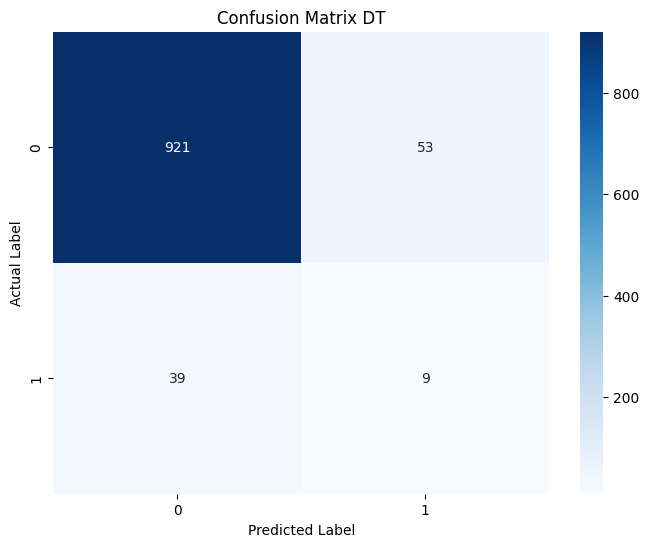

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix DT')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show() #slight better

In [39]:
from scipy.stats import randint

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(2, 15),          # sample depths between 2 and 20
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': randint(1, 10),   # sample leaf sizes 1–10
    'class_weight': ['balanced']    # try both balanced and default
}

rcv = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=30,      # more iterations for better exploration
    cv=5,
    random_state=4,
    n_jobs=-1,
    scoring='accuracy'
)

rcv.fit(x_train, y_train)

print("Best Params:", rcv.best_params_)
print("Best Score:", rcv.best_score_)


Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'splitter': 'best'}
Best Score: 0.8813552474465289


In [40]:
cm6 = confusion_matrix(rcv.predict(x_test),y_test)

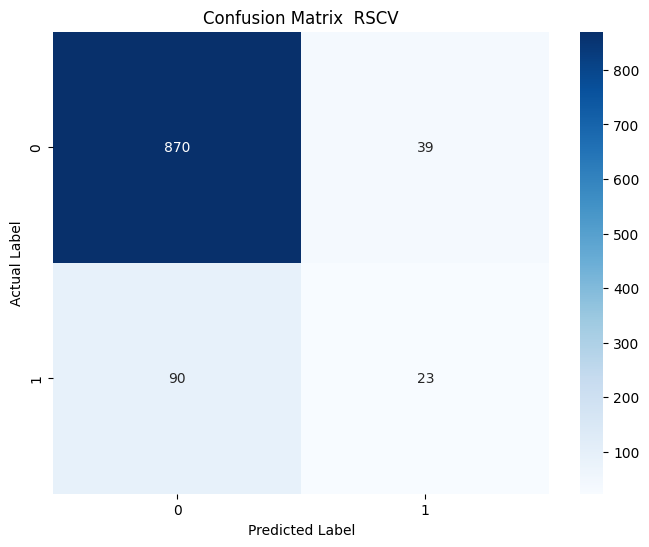

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix  RSCV')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

In [43]:
lr = LogisticRegression(C=np.float64(0.4205156450913872), max_iter=100,penalty='l1',solver='liblinear')
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=14, max_features=None, min_samples_leaf=1,splitter='best')
knn = KNeighborsClassifier(p=3,n_neighbors=15,weights='uniform',metric='euclidean')

In [44]:
estimators = [('lr',lr),('dt',dt),('knn',knn)]

In [45]:
estimators = [('lr',lr),('dt',dt),('knn',knn)]
vr =VotingClassifier(estimators)

In [46]:
vr.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=np.float64(0.4205156450913872),
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=14)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15, p=3))])

In [47]:
accuracy_score(vr.predict(x_test),y_test)

0.9393346379647749

In [48]:
cm7 = confusion_matrix(vr.predict(x_test),y_test)

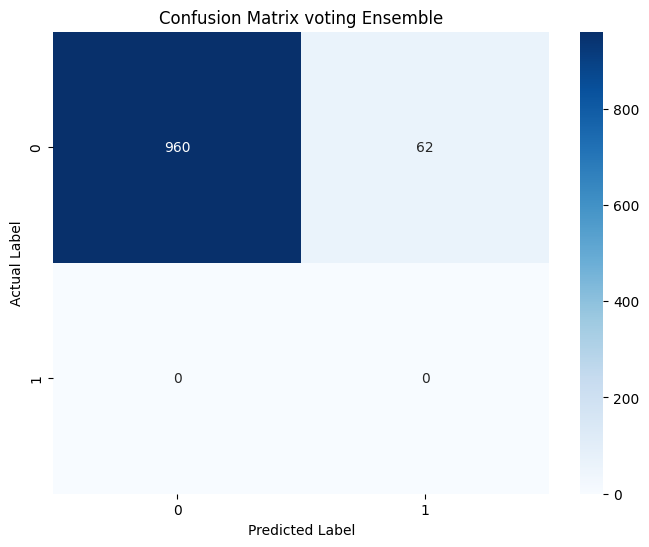

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix voting Ensemble')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h1> Lets try bagging </h1>

In [50]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
accuracy_score(rf.predict(x_test),y_test)

0.9393346379647749

In [52]:
cm8 = confusion_matrix(rf.predict(x_test),y_test)

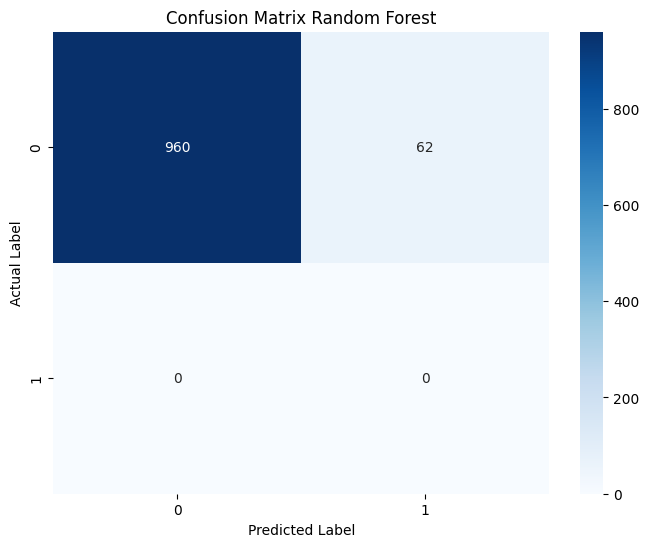

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [54]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [55]:
accuracy_score(ad.predict(x_test),y_test)

0.9393346379647749

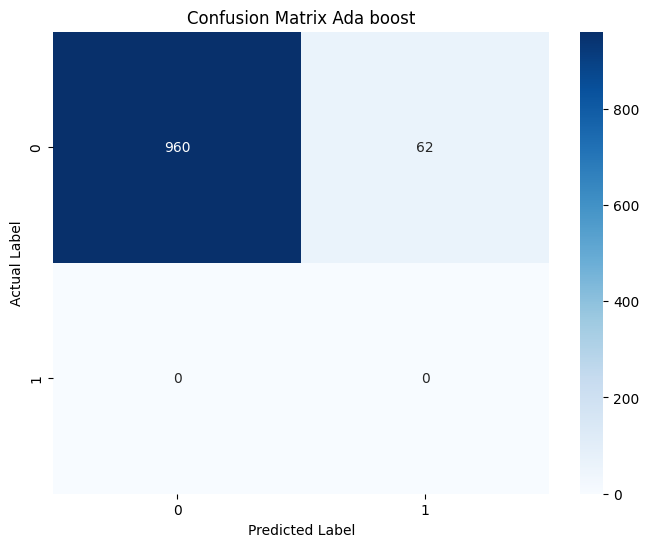

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(ad.predict(x_test),y_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Ada boost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [57]:
param_dist = {
    'n_estimators': randint(100, 1000),          # number of trees
    'max_depth': randint(5, 30),                # depth of each tree
    'min_samples_split': randint(2, 20),        # minimum samples to split node
    'min_samples_leaf': randint(1, 10),         # minimum samples in a leaf
    'max_features': ['sqrt', 'log2', None],     # features considered at each split
    'bootstrap': [True, False],                 # bootstrapping for trees
    'class_weight': ['balanced', 'balanced_subsample', None]  # handle imbalance
}

# Model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # number of parameter settings sampled
    cv=5,                  # 5-fold cross validation
    scoring='accuracy',          # F1 score works better for imbalanced data
    n_jobs=-1,             # use all cores
    random_state=42,
    verbose=1
)

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
accuracy_score(rf.predict(x_test),y_test)

0.9383561643835616

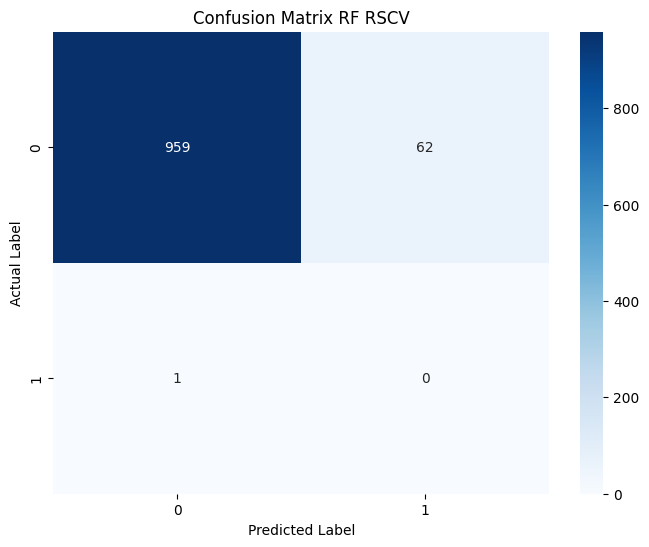

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(rf.predict(x_test),y_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix RF RSCV')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
pred = gb.predict(x_test)

In [63]:
accuracy_score(gb.predict(x_test),y_test)

0.9393346379647749

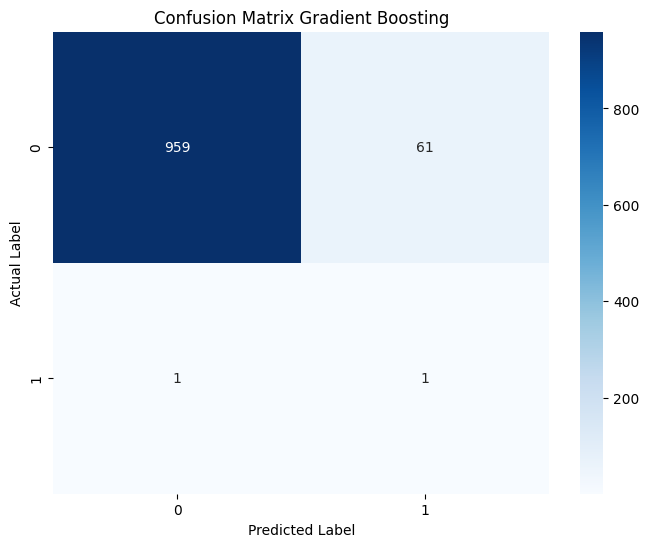

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(gb.predict(x_test),y_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Gradient Boosting')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()